# Exploration of Flight Data
## by Maitri Banga

## Preliminary Wrangling

> This flight data set has been taken from stat-computing.org, It consists of flight data of the year 2008. It consists of various columns related to delay and cancellation of flights

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
#Loading the dataset
flights_data = pd.read_csv('Flights.csv')

In [4]:
flights_data.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [5]:
flights_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [6]:
flights_data.shape
#removing unused column
del flights_data['Unnamed: 0']

In [7]:
#checking if it is removed
flights_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [8]:
#taking a sample of the dataset to reduce the size of dataset
flights_data = flights_data.sample(frac=.02)

In [9]:
flights_data.shape

(38735, 29)

In [10]:
#deleting the duplicate rows
print(flights_data.duplicated().sum())
flights_data = flights_data.drop_duplicates()

0


In [11]:
#making copy of dataset before performing the analysis
flights_data = flights_data.copy()

### Structure of the dataset

> The dataset has 38735 rows and 29 columns.\
> The following are the columns and their data types.\
> Year int64\
> Month int64\
> DayofMonth int64     
> DayOfWeek int64\
> DepTime float64\
> CRSDepTime int64  
> ArrTime float64\
> CRSArrTime int64  
> UniqueCarrier object\
> FlightNum int64  
> TailNum float64\
> ActualElapsedTime float64\
> CRSElapsedTime int64   
> AirTime float64\
> ArrDelay float64\
> DepDelay float64  
> Origin object   
> Dest object  
> Distance float64  
> TaxiIn float64  
> TaxiOut float64  
> Cancelled int64    
> CancellationCode float64  
> Diverted int64  
> CarrierDelay float64  
> WeatherDelay float64  
> NASDelay float64  
> SecurityDelay float64  
> LateAircraftDelay float64  

### Main feature(s) of interest in the dataset?

> We will be focussing on the cancelled and delayed flights

### Features in the dataset which will support the investigation into the feature(s) of interest?

> Year, Month and day of week column and the columns related to cancellation of flights and delay of fights

## Univariate Exploration

> Here we will perform the Univariate Exploration of the dataset

## Distance

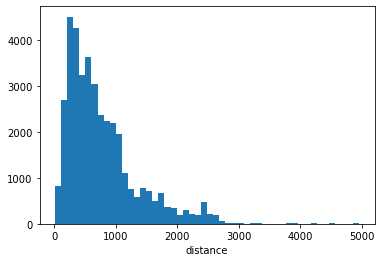

In [12]:
#looking at the distribution of distance
plt.hist(data = flights_data, x = "Distance", bins = 50)
plt.xlabel("distance");

In [13]:
#We can see that the plot is right skewed. 
#looking at data where distance>3500
flights_data[ flights_data.Distance > 3500].sample(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1930729,2008,12,7,7,1435.0,1335,2012.0,1935,CO,15,...,6.0,21.0,0,N,0,0.0,0.0,0.0,0.0,37.0
718764,2008,4,9,3,2018.0,1955,1215.0,1130,CO,14,...,13.0,19.0,0,N,0,23.0,0.0,22.0,0.0,0.0
175736,2008,1,28,1,1359.0,1320,1928.0,1920,CO,15,...,7.0,20.0,0,N,0,NaN,NaN,NaN,NaN,NaN
719151,2008,4,24,4,1143.0,1125,1518.0,1435,CO,73,...,16.0,22.0,0,N,0,18.0,0.0,25.0,0.0,0.0
1519874,2008,9,6,6,1342.0,1335,1803.0,1810,CO,15,...,5.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


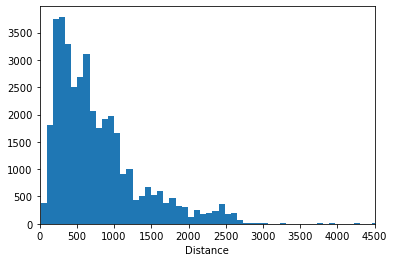

In [14]:
# looking at the data in the x-range bwtween 0 and 3500.
plt.hist(data=flights_data, x="Distance", bins=60)
plt.xlabel("Distance")
plt.xlim([0,4500]);

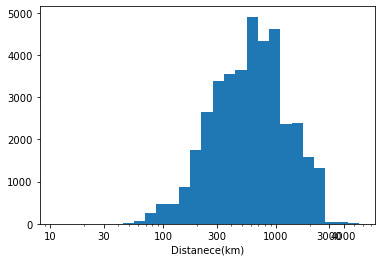

In [15]:
#since there is a tail on right, lets take log scale

bin = 10 ** np.arange(np.log10(flights_data.Distance.min()), np.log10(flights_data.Distance.max())+0.1, 0.1)
plt.hist(data=flights_data, x="Distance", bins=bin)
plt.xscale("log")
plt.xlabel("Distanece(km)")
plt.xticks([10,30,100,300,1000,3000,4000],[10,30,100,300,1000,3000,4000]);

> 

> Distance has a right skewed distribution, with a lot of flights on the short distance end, and a few on the long distance end. When plotted on a log-scale, the distance distribution looks roughly normal distribution. The flights become limited when the distance increases(more than 3000)

## ArrDelay

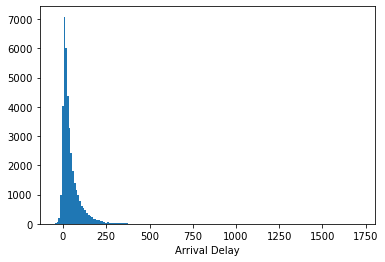

In [16]:
plt.hist(data=flights_data, x="ArrDelay", bins=np.arange(flights_data.ArrDelay.min(),flights_data.ArrDelay.max()+10,10) )
plt.xlabel("Arrival Delay");

In [17]:
#the extremely high values can be outliers
flights_data[(flights_data.ArrDelay > 700) ]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1236299,2008,7,24,4,714.0,1810,816.0,1915,AA,1935,...,8.0,16.0,0,N,0,654.0,0.0,0.0,0.0,127.0
1902540,2008,12,31,3,826.0,1330,1314.0,1820,AA,1272,...,12.0,12.0,0,N,0,1108.0,26.0,0.0,0.0,0.0
1909072,2008,12,17,3,743.0,1520,1257.0,1955,AA,2226,...,6.0,65.0,0,N,0,0.0,942.0,39.0,0.0,41.0
603847,2008,4,28,1,2306.0,1005,230.0,1334,XE,2351,...,14.0,16.0,0,N,0,776.0,0.0,0.0,0.0,0.0
514531,2008,3,19,3,744.0,1800,941.0,2025,NW,373,...,9.0,16.0,0,N,0,712.0,0.0,0.0,0.0,84.0
320529,2008,2,9,6,728.0,1724,951.0,1928,NW,473,...,6.0,39.0,0,N,0,839.0,0.0,19.0,0.0,5.0
1372720,2008,8,17,7,1829.0,600,1944.0,725,MQ,3864,...,13.0,5.0,0,N,0,739.0,0.0,0.0,0.0,0.0
844840,2008,5,31,6,1044.0,2110,1859.0,520,AA,14,...,9.0,7.0,0,N,0,585.0,0.0,5.0,0.0,229.0
1510834,2008,9,7,7,751.0,1450,1247.0,1955,AA,2012,...,12.0,9.0,0,N,0,982.0,0.0,0.0,0.0,30.0
285750,2008,2,15,5,7.0,950,200.0,1148,EV,4285,...,12.0,9.0,0,N,0,852.0,0.0,0.0,0.0,0.0


C:\Users\maitrib\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\maitrib\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


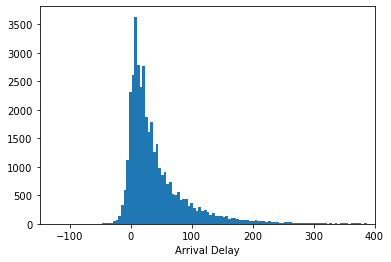

In [18]:
#lets change the bin size and look at it again
plt.hist(data=flights_data, x="ArrDelay", bins=400)
plt.xlabel("Arrival Delay")
plt.xlim([-150,400]);

> The distribution is right skewed and mode is around 0. There are flew flights which arrived before their time

## Dep Delay

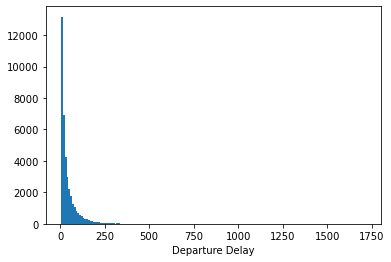

In [19]:
#plotting the Departure Delay
plt.hist(data=flights_data, x="DepDelay",bins=np.arange(flights_data.DepDelay.min(),flights_data.DepDelay.max()+10,10))
plt.xlabel("Departure Delay");

In [20]:
#looking for outliers on left
outlier_data = flights_data[flights_data.DepDelay < 0]
outlier_data['DepDelay']

Series([], Name: DepDelay, dtype: float64)

In [21]:
#looking for outliers on right
outlier_data = flights_data[flights_data.DepDelay > 1000]
outlier_data

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1902540,2008,12,31,3,826.0,1330,1314.0,1820,AA,1272,...,12.0,12.0,0,N,0,1108.0,26.0,0.0,0.0,0.0
1510834,2008,9,7,7,751.0,1450,1247.0,1955,AA,2012,...,12.0,9.0,0,N,0,982.0,0.0,0.0,0.0,30.0
1009553,2008,6,20,5,2140.0,1710,2252.0,1825,MQ,3538,...,6.0,16.0,0,N,0,1707.0,0.0,0.0,0.0,0.0
1029787,2008,6,2,1,1034.0,1635,1149.0,1744,NW,1432,...,14.0,13.0,0,N,0,1055.0,0.0,6.0,0.0,24.0


In [22]:
#removing outlier on the right
flights_data = flights_data[(flights_data.DepDelay < 1000)]

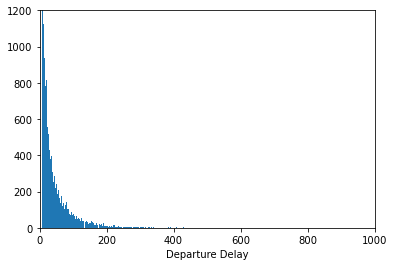

In [23]:
# plotting the histgram again
plt.hist(data=flights_data, x="DepDelay",bins=1000)
plt.xlabel("Departure Delay")
plt.xlim([0,1000])
plt.ylim([0,1200]);

> The distribution of the delay of departure time is right skewed and the mode is around 0 minutes.

## Delay Factors

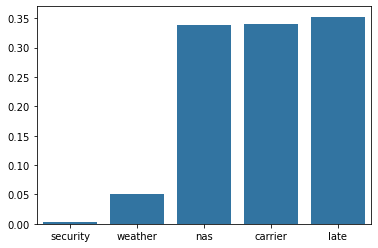

In [24]:
# The proportion where each type of delay occurs.
delay_car = flights_data[(~flights_data.CarrierDelay.isnull()) & (flights_data.CarrierDelay!=0)].shape[0] / flights_data.shape[0]
delay_weather = flights_data[(~flights_data.WeatherDelay.isnull()) & (flights_data.WeatherDelay!=0)].shape[0] / flights_data.shape[0]
delay_nas = flights_data[(~flights_data.NASDelay.isnull()) & (flights_data.NASDelay!=0)].shape[0] / flights_data.shape[0]
delay_sec = flights_data[(~flights_data.SecurityDelay.isnull()) & (flights_data.SecurityDelay!=0)].shape[0] / flights_data.shape[0]
delay_late = flights_data[(~flights_data.LateAircraftDelay.isnull()) & (flights_data.LateAircraftDelay!=0)].shape[0] / flights_data.shape[0]

delays = pd.Series([delay_car,delay_weather,delay_nas,delay_sec,delay_late], index=["carrier","weather","nas","security","late"]).sort_values(ascending=True)
sb.barplot(delays.index, delays, color=sb.color_palette()[0]);

> We can see that most of the delays are because of late aircraft, then carrier delays and then NAS delays (minute difference between them). Then we have weather delays and few security delays



> The Distance, Arrival Delay and Departure Delay all have right skewed distributions. From the distribution of Arrival Delay, we see that many flights reached before their scheduled time.



> Removed observation where departure delay is more than 1000

## Bivariate Exploration

> Bivariate Analysis has been performed here

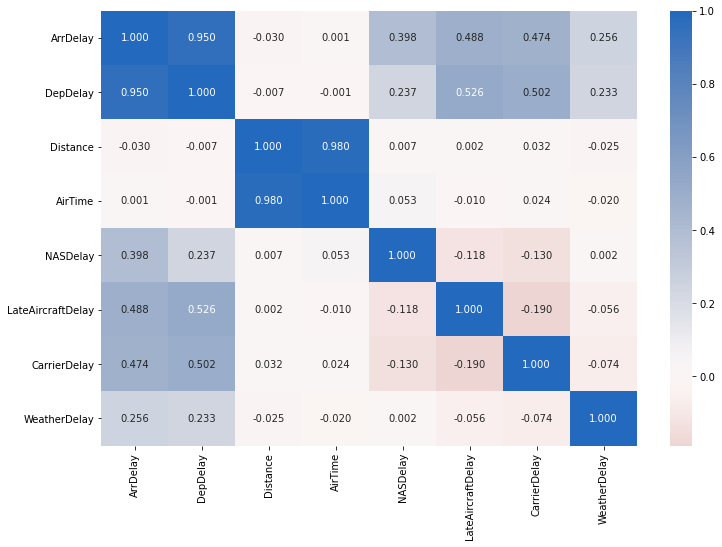

In [25]:
#lets first look at pair wise correlations present between the features of the dataset
numeric_vars = ["ArrDelay","DepDelay","Distance","AirTime","NASDelay","LateAircraftDelay","CarrierDelay","WeatherDelay"]
categoric_var = []
# correlation plot
plt.figure(figsize=[12,8])
sb.heatmap(flights_data[numeric_vars].corr(), annot=True, fmt=".3f", cmap="vlag_r", center=0);

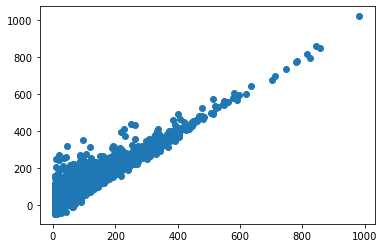

In [26]:
#relationship between arrival and departure delays
plt.scatter(data=flights_data, x='DepDelay', y='ArrDelay')
plt.show()

> There is a strong positive relationship between the two

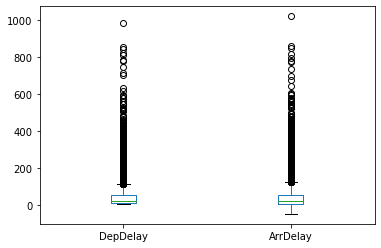

In [27]:
#boxplot of arrival and departure delays
flights_data.loc[:,['DepDelay', 'ArrDelay']].plot.box()

In [158]:
#from above we see there are a few outliers but we do not need to remove any, since we already did

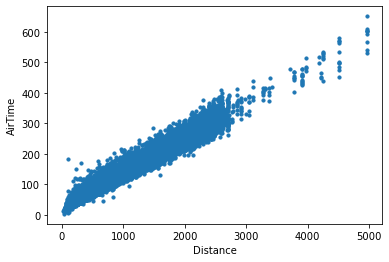

In [28]:
#distance vs air time
plt.scatter(data=flights_data, x="Distance", y="AirTime", s=10)
plt.xlabel("Distance") 
plt.ylabel("AirTime");

In [165]:
#we see that as the distance increases the air time increases which is the expected behaviour

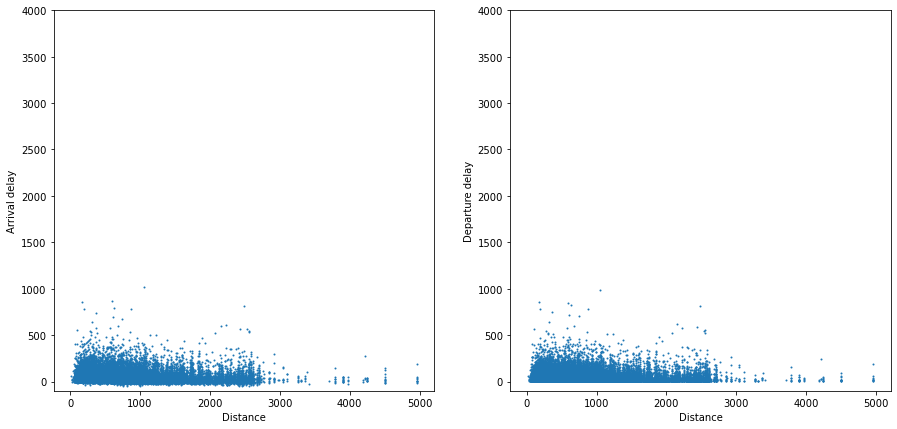

In [29]:
#distance vs arrival delay and distance vs departure delay

plt.figure(figsize=[15,7])
plt.subplot(1,2,1)
plt.scatter(data=flights_data, x="Distance", y="ArrDelay", s=1)
plt.xlabel("Distance")
plt.ylabel("Arrival delay")
plt.ylim([-100,4000]);

plt.subplot(1,2,2)
plt.scatter(data=flights_data, x="Distance", y="DepDelay", s=1)
plt.xlabel("Distance")
plt.ylabel("Departure delay")
plt.ylim([-100,4000]);


In [30]:
#we see that both arrival and departure delays are lesser when the distance increases to a large extent

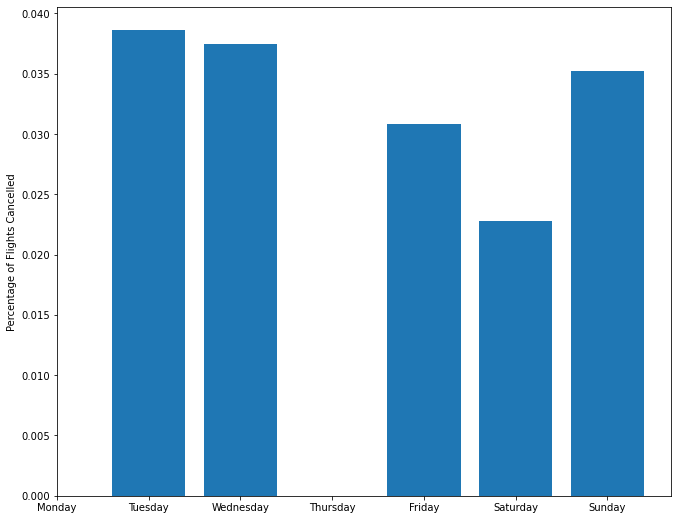

In [34]:
#relationship between days of week and flights cancelled
cancelled = flights_data[flights_data['Cancelled']==1]
days_cancelled = cancelled['Cancelled'].groupby(flights_data['DayOfWeek']).count()
days_total = flights_data['Cancelled'].groupby(flights_data['DayOfWeek']).count()
days_fraction = np.divide(days_cancelled, days_total)
x_values= days_fraction.index.values
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, ax = plt.subplots(figsize = (11,9))
ax.bar(x_values,days_fraction*100, align='center')
ax.set_ylabel('Percentage of Flights Cancelled')
ax.set_xticks(x_values)
ax.set_xticklabels(week)

plt.show()

> Saturday has the highest percentage of cancelled flights and then tuesday. Least number of flights are cancelled on monday and then wednesday



> There is a positive relationship between arrival and departure delays and distance and air time. there is no significant relationship between departure delays/arrival delays and distance.



> From the correlation graph we see that there is a week relationship between distance vs all types of delays and air time vs all types of delays

## Multivariate Exploration

> Here we perform the multivariate analysis

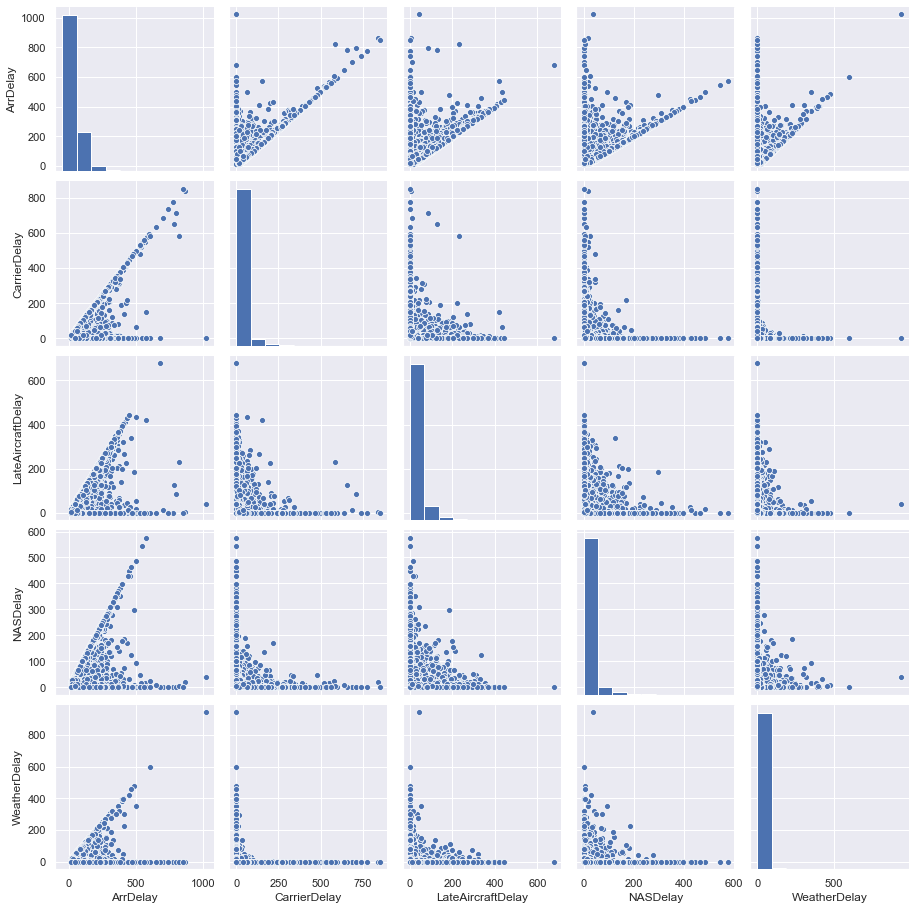

In [35]:
#scatterplot between types of delays
sb.set()
delay_cols = ['ArrDelay', 'CarrierDelay', 'LateAircraftDelay', 'NASDelay', 'WeatherDelay']
sb.pairplot(flights_data[delay_cols], height = 2.5)
plt.show()

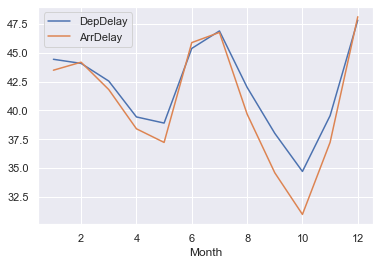

In [36]:
#delays by month
flights_data.groupby('Month').agg({'DepDelay':'mean', 'ArrDelay':'mean'}).plot.line()
plt.show()

> We see that arriaval delay is least in october month and same goes with departure delay. Both arrival and departure delays are highest in December

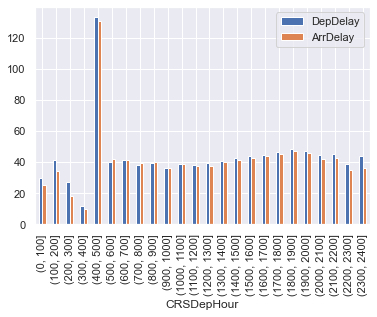

In [37]:
#relation between time and arrival and departure delays
flights_data['CRSDepHour'] = pd.cut(flights_data.CRSDepTime, list(range(0, 2500, 100)))
flights_data.groupby('CRSDepHour').agg({'DepDelay':'mean', 'ArrDelay':'mean'}).plot.bar()
plt.show()

In [34]:
#best time to fly in morning 

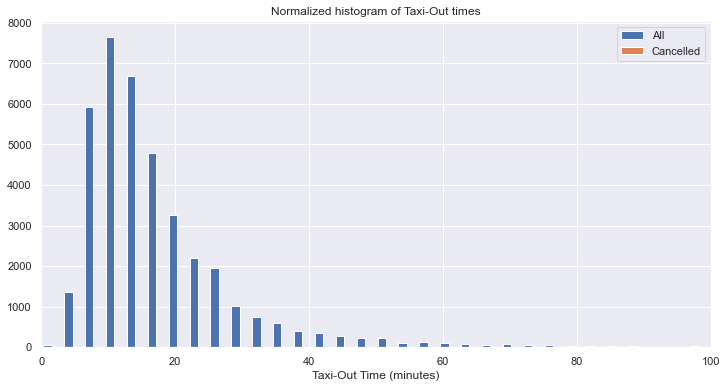

In [38]:
#taxi out times for all flights vs cancelled flights
fig, ax = plt.subplots(figsize = (12,6))

ax.hist([flights_data['TaxiOut'], cancelled['TaxiOut']], bins=100, label=['All', 'Cancelled'])

ax.set_xlim(0,100)
ax.set_xlabel('Taxi-Out Time (minutes)')
ax.set_title('Normalized histogram of Taxi-Out times')

plt.legend()
plt.show();

In [ ]:
#no taxi out times for cancelled flights.

In [39]:
# lets make subset of the main dataframe which has 4 columns, delay type, delay time, DepDelay, distance

sub_set = pd.DataFrame()
delay_types = ["NASDelay","LateAircraftDelay","CarrierDelay","WeatherDelay","SecurityDelay"]

for type in delay_types:
    sub = pd.DataFrame()
    sub["time"] = flights_data[(flights_data[type] != 0) & (~flights_data[type].isnull())][type]
    sub["DepDelay"] = flights_data[(flights_data[type] != 0) & (~flights_data[type].isnull())]["DepDelay"]
    sub["ArrDelay"] = flights_data[(flights_data[type] != 0) & (~flights_data[type].isnull())]["ArrDelay"]
    sub["Distance"] = flights_data[(flights_data[type] != 0) & (~flights_data[type].isnull())]["Distance"]
    sub["type"] = type
    sub_set = sub_set.append(sub)


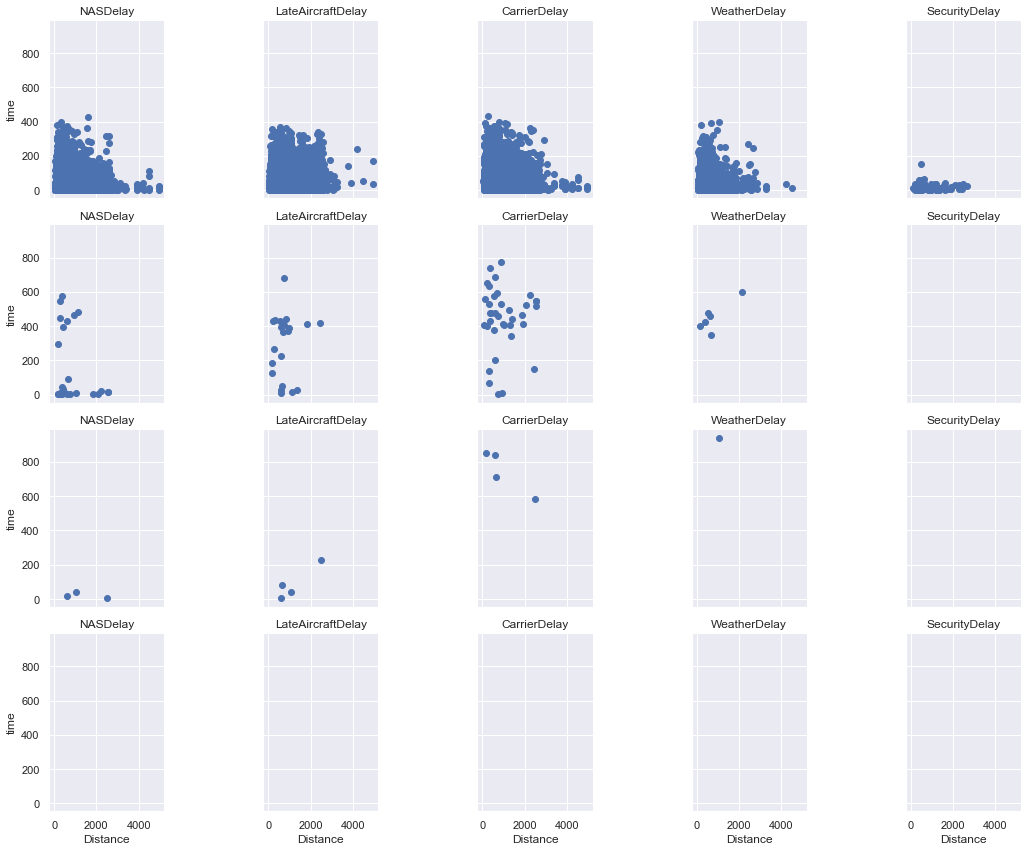

In [40]:
#relationship between departure delays and all delays
bin_edges = np.arange(0,2000,400)
sub_set["dep_delay"] = pd.cut(sub_set.DepDelay, bin_edges, right=False, include_lowest=True)
h = sb.FacetGrid(data=sub_set, row="dep_delay", col="type" )
h.map(plt.scatter, "Distance", "time")
h.set_titles('{col_name}');

In [ ]:
#carrier delay most affected by departure delays

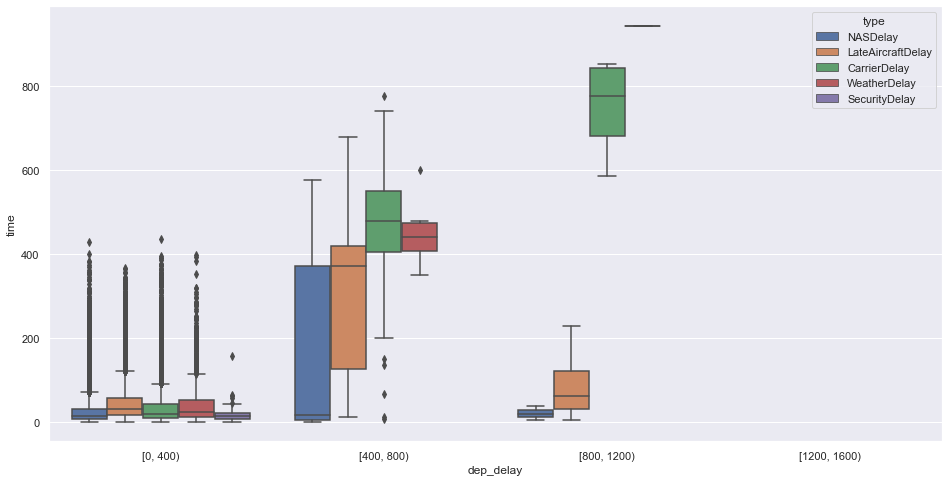

In [41]:
plt.figure(figsize=[16,8])
sb.boxplot(data=sub_set, hue="type", y="time", x="dep_delay");

In [53]:
#for carrier and late aircraft delay, we have longer the departure delay.



> We looked at relationship between various types of delays and the relationship between arrival delays/departure delays and month and days of week. We got some interesting insights from that.


> taxi out times hass no significance with cancelled flights, carrier delay most affected by departure delays, weather delay has different tendencies from all other delays.